# Практическая работа №2
## по предмету "Системы искусственного интеллекта"

Целью практической работы является изучение моделей машинного обучения для задачи регрессии.

Выполните предварительную обработку и анализ набора данных.

Затем вам необходимо выбрать 3 модели машинного обучения, которые могут решать задачу регрессии, и обучить их на основе данного набора данных. Обязательным условием является построение графика изменения loss для каждой из выбранных моделей. В результате выполнения работы необходимо сделать вывод, какая из моделей лучше подошла для решения поставленной задачи.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [3]:
df = pd.read_csv('AISP2.csv')
df

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,ASUS,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,34649,2 stars,3,0
1,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,38999,3 stars,65,5
2,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,39999,3 stars,8,1
3,ASUS,Intel,Core i5,10th,8 GB,DDR4,512 GB,0 GB,Windows,32-bit,2 GB,Casual,No warranty,No,No,69990,3 stars,0,0
4,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,26990,3 stars,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,0 GB,Casual,1 year,No,No,135990,3 stars,0,0
819,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,0 GB,Casual,1 year,No,No,144990,3 stars,0,0
820,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,4 GB,Casual,1 year,No,No,149990,3 stars,0,0
821,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,4 GB,Casual,1 year,No,No,142990,3 stars,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 823 entries, 0 to 822
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   brand              823 non-null    object
 1   processor_brand    823 non-null    object
 2   processor_name     823 non-null    object
 3   processor_gnrtn    823 non-null    object
 4   ram_gb             823 non-null    object
 5   ram_type           823 non-null    object
 6   ssd                823 non-null    object
 7   hdd                823 non-null    object
 8   os                 823 non-null    object
 9   os_bit             823 non-null    object
 10  graphic_card_gb    823 non-null    object
 11  weight             823 non-null    object
 12  warranty           823 non-null    object
 13  Touchscreen        823 non-null    object
 14  msoffice           823 non-null    object
 15  Price              823 non-null    int64 
 16  rating             823 non-null    object
 1

In [5]:
df.describe()

,Price,Number of Ratings,Number of Reviews
count,823.000000,823.000000,823.000000
mean,76745.177400,315.301337,37.609964
std,45101.790525,1047.382654,121.728017
min,16990.000000,0.000000,0.000000
25%,46095.000000,0.000000,0.000000
50%,64990.000000,17.000000,2.000000
75%,89636.000000,139.500000,18.000000
max,441990.000000,15279.000000,1947.000000


In [6]:
target_col = 'Price'
X = df.drop(columns=[target_col])
y = df[target_col]

In [7]:
X = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
class LinearRegressionCustom:
    def __init__(self, lr=0.01, num_iter=1000):
        self.lr = lr
        self.num_iter = num_iter
        self.loss_history = []

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.W = np.zeros(n_features)
        self.b = 0

        for i in range(self.num_iter):
            y_pred = np.dot(X, self.W) + self.b
            loss = np.mean((y_pred - y) ** 2)
            self.loss_history.append(loss)

            dW = (2 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (2 / n_samples) * np.sum(y_pred - y)

            self.W -= self.lr * dW
            self.b -= self.lr * db

    def predict(self, X):
        return np.dot(X, self.W) + self.b

In [9]:
lin_reg = LinearRegressionCustom(lr=0.01, num_iter=300)
lin_reg.fit(X_train, y_train)
y_pred_lr = lin_reg.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)

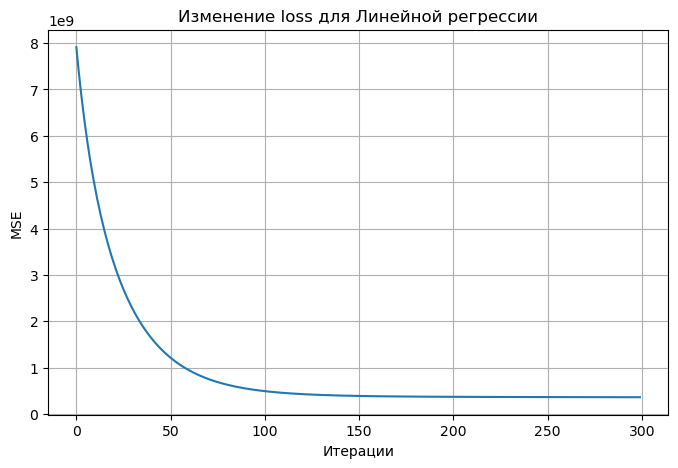

In [10]:
plt.figure(figsize=(8,5))
plt.plot(lin_reg.loss_history)
plt.title("Изменение loss для Линейной регрессии")
plt.xlabel("Итерации")
plt.ylabel("MSE")
plt.grid(True)
plt.show()

In [11]:
class WeightedKNNRegressor:
    def __init__(self, k=5):
        self.k = k
        self.loss_history = []

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        preds = []
        for x in X:
            distances = np.sqrt(np.sum((self.X_train - x) ** 2, axis=1))
            k_idx = np.argsort(distances)[:self.k]
            k_distances = distances[k_idx]
            k_values = self.y_train.iloc[k_idx] if isinstance(self.y_train, pd.Series) else self.y_train[k_idx]

            weights = 1 / (k_distances + 1e-5)
            weighted_avg = np.sum(weights * k_values) / np.sum(weights)
            preds.append(weighted_avg)
        return np.array(preds)

In [12]:
k_values = range(1, 21)
mse_knn_list = []
for k in k_values:
    knn = WeightedKNNRegressor(k=k)
    knn.fit(X_train, y_train)
    y_pred_knn = knn.predict(X_test)
    mse = mean_squared_error(y_test, y_pred_knn)
    mse_knn_list.append(mse)
best_k = k_values[np.argmin(mse_knn_list)]
best_knn = WeightedKNNRegressor(k=best_k)
best_knn.fit(X_train, y_train)
y_pred_best_knn = best_knn.predict(X_test)
mse_knn = mean_squared_error(y_test, y_pred_best_knn)

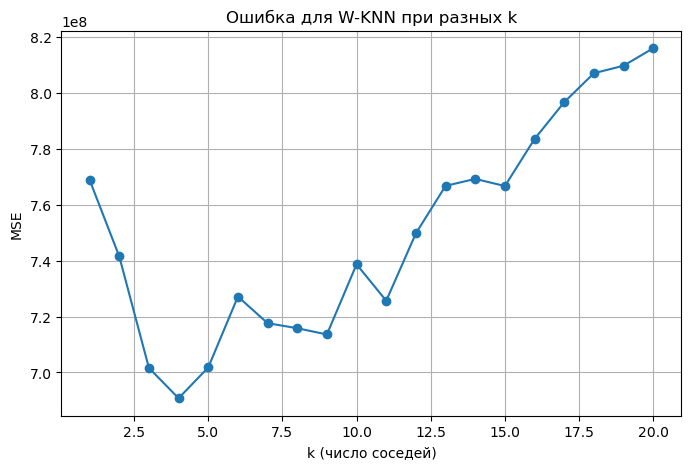

In [13]:
plt.figure(figsize=(8,5))
plt.plot(k_values, mse_knn_list, marker='o')
plt.title("Ошибка для W-KNN при разных k")
plt.xlabel("k (число соседей)")
plt.ylabel("MSE")
plt.grid(True)
plt.show()

In [14]:
class DecisionTreeModel:
    def __init__(self, max_depth_range=range(1, 21)):
        self.max_depth_range = max_depth_range
        self.loss_history = []

    def fit(self, X_train, y_train, X_test, y_test):
        self.models = []
        for d in self.max_depth_range:
            model = DecisionTreeRegressor(max_depth=d, random_state=42)
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            loss = mean_squared_error(y_test, y_pred)
            self.loss_history.append(loss)
            self.models.append(model)
        self.best_depth = self.max_depth_range[np.argmin(self.loss_history)]
        self.best_model = self.models[np.argmin(self.loss_history)]

    def predict(self, X):
        return self.best_model.predict(X)

In [15]:
tree_model = DecisionTreeModel()
tree_model.fit(X_train, y_train, X_test, y_test)
y_pred_tree = tree_model.predict(X_test)
mse_tree = mean_squared_error(y_test, y_pred_tree)

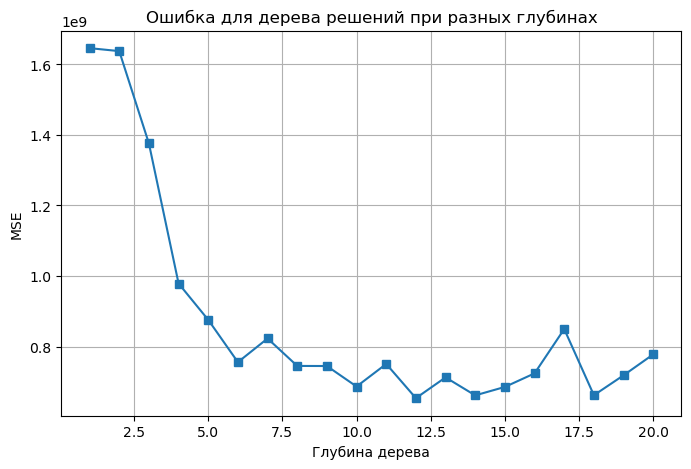

In [16]:
plt.figure(figsize=(8,5))
plt.plot(tree_model.max_depth_range, tree_model.loss_history, marker='s')
plt.title("Ошибка для дерева решений при разных глубинах")
plt.xlabel("Глубина дерева")
plt.ylabel("MSE")
plt.grid(True)
plt.show()

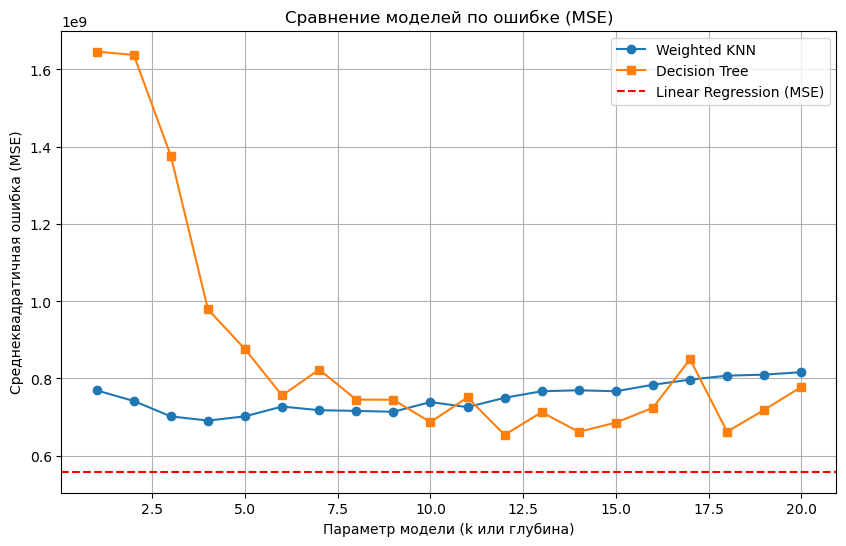

In [19]:
plt.figure(figsize=(10,6))
plt.plot(k_values, mse_knn_list, marker='o', label='Weighted KNN')
plt.plot(tree_model.max_depth_range, tree_model.loss_history, marker='s', label='Decision Tree')
plt.axhline(y=mse_lr, color='r', linestyle='--', label='Linear Regression (MSE)')
plt.title("Сравнение моделей по ошибке (MSE)")
plt.xlabel("Параметр модели (k или глубина)")
plt.ylabel("Среднеквадратичная ошибка (MSE)")
plt.legend()
plt.grid(True)
plt.show()

In [18]:
print("=== ИТОГОВЫЕ РЕЗУЛЬТАТЫ ===")
print(f"Линейная регрессия: MSE = {mse_lr:.4f}")
print(f"Weighted KNN (k={best_k}): MSE = {mse_knn:.4f}")
print(f"Decision Tree (глубина={tree_model.best_depth}): MSE = {mse_tree:.4f}")

best_model = min(
    [("Linear Regression", mse_lr), 
     ("Weighted KNN", mse_knn), 
     ("Decision Tree", mse_tree)], 
    key=lambda x: x[1]
)

print(f"\nЛУЧШАЯ МОДЕЛЬ: {best_model[0]} (ошибка {best_model[1]:.4f})")

=== ИТОГОВЫЕ РЕЗУЛЬТАТЫ ===
Линейная регрессия: MSE = 558547630.8135
Weighted KNN (k=4): MSE = 690787481.4806
Decision Tree (глубина=12): MSE = 653721484.4328

ЛУЧШАЯ МОДЕЛЬ: Linear Regression (ошибка 558547630.8135)
